# **Predicting the Likelihood of Crime Resolution Based on Case Details and Crime Type**

**Team Members:**

1. **Name:** Quhura Fathima

   **Email:** qfath001@odu.edu

   **Portfolio Link:** https://qfath001.github.io/

2. **Name:** Reema Mahabooba

   **Email:** rmaha007@odu.edu

   **Portfolio Link:** https://rmaha007.github.io/

3. **Name:** Stephen Croffie Djan

   **Email:** scrof001@odu.edu

   **Portfolio Link:** https://stephendjan.github.io/scrof001.github.io/

# **Abstract**

**Dataset URL:** [City of LA Crime Data from 2020 to Present](https://catalog.data.gov/dataset/crime-data-from-2020-to-present)

This project utilizes the "Crime Data from 2020 to Present" dataset to predict crime resolution likelihood and identify trends through data analysis and modeling. Key stages include data wrangling (cleaning and transformation), exploratory analysis (EDA), feature engineering, and classification (predicting whether a crime case will be resolved or not). Model evaluation will be based on performance metrics like accuracy, precision, recall, and F1-score. Visualizations will highlight patterns, crime hotspots, and the influence of temporal and spatial factors on crime resolution. The roadmap incorporates stages for wrangling, analysis, modeling, and results presentation, ensuring robust evaluation and actionable insights for law enforcement.

**Few records of the dataset:**

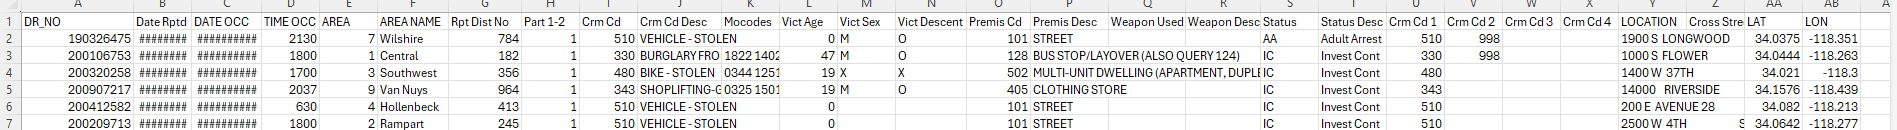

**Goal of the Project:**

The goal of this project is to develop a classification model that predicts whether a crime case will be resolved or remain unsolved based on historical crime data. Not all crimes are solved at the same rate, with violent crimes typically being more difficult to resolve compared to property crimes. By predicting the likelihood of crime resolution, law enforcement agencies can better allocate resources. The model will use features like crime type, location, victim demographics, and time of occurrence to identify patterns influencing case outcomes. Logistic Regression, Random Forest, and XGBoost will be used to build the model, with evaluation based on metrics like accuracy, precision, recall, and F1-score. The model's insights will allow police departments to focus on cases that are less likely to be resolved, optimizing resource allocation and improving overall case resolution rates.

**Project Plan**

**1. Data Wrangling and Preparation (Weeks 1-2)**

-> **Data Cleaning:** Handle missing or inconsistent data (e.g., missing victim details, crime status, location data). Ensure proper handling of missing values in columns like victim age, location, and crime status.

-> **Data Transformation:** Convert columns like crime date and time into usable formats (e.g., date-time format), encode categorical data (e.g., crime type, crime status).

-> **Feature Extraction:** Derive new features like time of day, day of week, and crime severity to aid in prediction.


**2. Exploratory Data Analysis (Weeks 2-3)**

-> **Visualization:** Create visualizations to analyze patterns, such as the time of day or day of week when crimes are most likely to be resolved. Use heatmaps to visualize crime hotspots based on location and time.

-> **Statistical Analysis:** Investigate correlations between features (e.g., victim age and crime resolution likelihood). Summarize crime distribution across different locations and crime types.


**3. Feature Engineering and Modeling (Weeks 4-5)**

-> **Model Selection:** Choose appropriate classification algorithms like Random Forest, Logistic Regression, or XGBoost for predicting crime resolution.

-> **Data Splitting:** Split the dataset into training and testing sets. Use cross-validation to ensure robustness of the model.

-> **Feature Engineering:** Refine features based on the data (e.g., crime types vs resolved/unsolved, location proximity to key areas, victim demographics).


**4. Model Training and Evaluation (Weeks 6-7)**

-> **Model Training**: Train the selected models on the prepared dataset using the training set.

-> **Evaluation:** Assess models based on accuracy, precision, recall, and F1-score for classification. Perform confusion matrix analysis and AUC-ROC curves to evaluate performance.

-> **Hyperparameter Tuning:** Apply techniques like grid search or random search to optimize model hyperparameters.


**5. Model Refinement and Visualization (Weeks 8-9)**

-> **Model Refinement:** Refine the model based on evaluation results and optimize for better generalization.

-> **Visualizations:** Create final visualizations that highlight crime resolution patterns, crime hotspots, and model predictions. Present patterns in terms of temporal trends (when crimes are most likely to be solved) and location-based trends.

-> **Model Insights:** Generate actionable insights on the factors influencing crime resolution and provide recommendations for law enforcement resource allocation.


**6. Project Finalization and Report (Week 10)**

-> **Final Report:** Compile all findings, model evaluation results, and visualizations into a comprehensive final report. Discuss the impact of temporal and spatial features on crime resolution and how the model can assist law enforcement.

**-> Presentation:** Prepare a final presentation showcasing key findings, the model's effectiveness, and how it can improve police resource allocation.

**Team Member Contribution Plan**

Roles will be assigned based on team members' strengths. One member will focus on data wrangling (cleaning, preprocessing, and feature extraction), another on model development (building and evaluating classification models), and the third will handle EDA, visualization, and report generation. Each member will take ownership of their tasks while collaborating to ensure smooth integration of the project.

In [5]:
import pandas as pd

# Load the dataset
file_path = "CS620_Project/Crime_Data_from_2020_to_Present.csv"  # Update this if needed
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130
